<a href="https://colab.research.google.com/github/page-jerzak/ai_computing/blob/main/DS_Methods_Feature_Extraction_and_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS Methods - Feature Extraction and Feature Engineering Notebook

### Use the summary dataset to investigate the impact of conversational agent's language style (Condition), whether formal or informal, on students' language usage (Formality) before and after a 3-hour intervention (Test). The relevant paper is located in the Resources folder within this module.

## Task 1. Data Cleaning

### 1.1 Install and import the Package
#### Install the packages if you haven't, using "!pip install package"

In [1]:
# !pip install pandas

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os

#### Check the current working directory and set options to show all the columns in the data

In [3]:
os.getcwd()
pd.set_option('display.max_columns', None)

### 1.2 Upload the data and clean the data

In [4]:
from google.colab import files
dataset = files.upload()
filename = list(dataset.keys())[0]
print(f"{filename} has been uploaded")

Saving summary.csv to summary.csv
summary.csv has been uploaded


In [5]:
df = pd.read_csv("summary.csv")

#### 1.2.1 Review the data [e.g., df.head()] and retrieve the names of all the columns [e.g., df.columns.tolist()]

In [6]:
df.head(5)

,UserID,LessonID,Session,ClassID,GroupID,TextOrder,StrOrder,Structure,LessonAttempt,TrialNo,TotalTime,TotalTimeCompute,XML,Q1Data,Q2Data,Arousal,Valence,MindWand,TextDiff,SumWrite,SelfRate,Rating1,Rating2,Rating3,Rating1Cor,Rating2Cor,Rating3Cor,Rating1SQRT,Rating2SQRT,Rating3SQRT,ReadTime,AffectRT,MindWandRT,TextDiffRT,SumRT,SelfRateRT,Rating1RT,Rating2RT,Rating3RT,SurveyID,Condition,ID_Pre,Age,Sex,Ethnicity,CountrBorn,CountrStay,Language,EngYear,EngCoun,Howlong,Edu,Major,Status,Job,StudyFurth,ImportanceReading,ImportanceSummary,Typing,DurationPost,DurationPre,PropDog,PropJobFair,PropChocolate,PropTotal,ZPropTotal,PCPreEfficacy,PCPreSumPerception,PCComputerExperience,PCPostEfficacy,PCAttitudeTeacher,PCAttitudeStudent,ZAttitude_17,ZAttitude_18,CohMetrixID,AvgFormality,Trial,DESPC,DESSC,DESWC,DESPL,DESPLd,DESSL,DESSLd,DESWLsy,DESWLsyd,DESWLlt,DESWLltd,PCNARz,PCNARp,PCSYNz,PCSYNp,PCCNCz,PCCNCp,PCREFz,PCREFp,PCDCz,PCDCp,PCVERBz,PCVERBp,PCCONNz,PCCONNp,PCTEMPz,PCTEMPp,CRFNO1,CRFAO1,CRFSO1,CRFNOa,CRFAOa,CRFSOa,CRFCWO1,CRFCWO1d,CRFCWOa,CRFCWOad,CRFANP1,CRFANPa,LSASS1,LSASS1d,LSASSp,LSASSpd,LSAPP1,LSAPP1d,LSAGN,LSAGNd,LDTTRc,LDTTRa,LDMTLD,LDVOCD,CNCAll,CNCCaus,CNCLogic,CNCADC,CNCTemp,CNCTempx,CNCAdd,CNCPos,CNCNeg,SMCAUSv,SMCAUSvp,SMINTEp,SMCAUSr,SMINTEr,SMCAUSlsa,SMCAUSwn,SMTEMP,SYNLE,SYNNP,SYNMEDpos,SYNMEDwrd,SYNMEDlem,SYNSTRUTa,SYNSTRUTt,DRNP,DRVP,DRAP,DRPP,DRPVAL,DRNEG,DRGERUND,DRINF,WRDNOUN,WRDVERB,WRDADJ,WRDADV,WRDPRO,WRDPRP1s,WRDPRP1p,WRDPRP2,WRDPRP3s,WRDPRP3p,WRDFRQc,WRDFRQa,WRDFRQmc,WRDAOAc,WRDFAMc,WRDCNCc,WRDIMGc,WRDMEAc,WRDPOLc,WRDHYPn,WRDHYPv,WRDHYPnv,WRDPOSin,WRDPOSuh,RDFRE,RDFKGL,RDL2,formality,NonNarrativity,Syntactic Complexity,Word Abstractness,Referential Cohesion,Deep Cohesion,Test
0,FORMAL1_01,lesson10,Test,formal,1,1,11,Comparison,2,2,1702.352,1677.857,Lesson10-Butterfly.xml,Next,Arousal5_Pleasant5,5,5,2,2,Insects Insects butterfly and moth are very ti...,5.0,5.0,5.0,5.0,1.5,3.5,5.5,1.870829,1.224745,0.707107,1361.360,10.953,10.406,4.875,262.812,6.281,13.593,3.781,3.796,86,Formal,1,30,2,5,India,India,2,15,2.0,0.0,8,pharmacy,2,online selling,2,1,1,3,182,564.0,0.666667,1.0,0.5,0.7,-0.177352,0.674246,0.824913,1.056,-1.063388,-1.618065,-0.828716,-1.888861,-2.229093,2011,NaN,1,1,6,56,6,0,9.667,8.501,1.607,0.755,5.214,2.661,-0.904,18.410000,0.363,64.059998,-0.406,34.459999,-0.871,19.219999,0.008,50.000000,2.377,99.110001,-0.920,17.879999,2.160,98.459999,0.0,0.4,0.0,0.067,0.267,0.133,0.124,0.170,0.080,0.126,0.6,0.400,0.185,0.191,0.193,0.241,0,0,0.241,0.222,0.857,0.776,72.455002,0.0,71.429001,35.714001,17.857,17.857,17.857,0.000,17.857000,71.429001,0.000,35.714001,53.570999,17.857000,0.333,1.0,0.150,0.800,1.00,1.500,0.667,0.561,0.902,0.902,0.300,0.216,303.571014,196.429001,17.857,89.286003,0.0,0.000,0.000000,0.000,285.713989,53.570999,178.570999,107.142998,53.570999,0.0,0.000,0.0,0.0,53.570999,2.304,2.780,0.770,285.399994,570.232971,377.723999,406.600006,418.148010,5.213,6.992,1.125,2.119,89.286003,0.000,61.410000,7.012,30.988001,0.084,0.8159,0.3594,0.6554,0.1922,0.5000,PreTest
1,FORMAL1_01,lesson2,Test,formal,1,8,22,Causation,1,1,181.785,160.728,Lesson2-Flood.xml,Next,Arousal5_Pleasant5,5,5,2,3,natural waterflowfloods are a natural disaster...,3.0,4.0,4.0,4.0,3.5,1.5,5.5,0.707107,1.581139,1.224745,13.421,2.765,5.046,3.296,122.421,2.468,3.609,3.593,4.109,86,Formal,1,30,2,5,India,India,2,15,2.0,0.0,8,pharmacy,2,online selling,2,1,1,3,182,564.0,0.666667,1.0,0.5,0.7,-0.177352,0.674246,0.824913,1.056,-1.063388,-1.618065,-0.828716,-1.888861,-2.229093,2013,NaN,1,1,3,30,3,0,10.333,2.887,1.633,0.999,5.500,3.481,-1.345,9.010000,2.427,99.220001,1.182,88.099998,-2.429,0.750000,0.745,77.040001,0.421,66.279999,-9.107,0.000000,-0.256,40.130001,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.216,0.224,0.152,0.193,0,0,0.119,0.156,0.947,0.806,44.847000,0.0,166.667007,33.333000,66.667,33.333,0.000,0.000,133.332993,133.332993,33.333,66.667000,100.000000,66.667000,0.333,0.0,0.046,0.800,0.75,2.333,1.125,0.806,0.958,0.958,0.1

In [7]:
df.columns.tolist()

['UserID',
 'LessonID',
 'Session',
 'ClassID',
 'GroupID',
 'TextOrder',
 'StrOrder',
 'Structure',
 'LessonAttempt',
 'TrialNo',
 'TotalTime',
 'TotalTimeCompute',
 'XML',
 'Q1Data',
 'Q2Data',
 'Arousal',
 'Valence',
 'MindWand',
 'TextDiff',
 'SumWrite',
 'SelfRate',
 'Rating1',
 'Rating2',
 'Rating3',
 'Rating1Cor',
 'Rating2Cor',
 'Rating3Cor',
 'Rating1SQRT',
 'Rating2SQRT',
 'Rating3SQRT',
 'ReadTime',
 'AffectRT',
 'MindWandRT',
 'TextDiffRT',
 'SumRT',
 'SelfRateRT',
 'Rating1RT',
 'Rating2RT',
 'Rating3RT',
 'SurveyID',
 'Condition',
 'ID_Pre',
 'Age',
 'Sex',
 'Ethnicity',
 'CountrBorn',
 'CountrStay',
 'Language',
 'EngYear',
 'EngCoun',
 'Howlong',
 'Edu',
 'Major',
 'Status',
 'Job',
 'StudyFurth',
 'ImportanceReading',
 'ImportanceSummary',
 'Typing',
 'DurationPost',
 'DurationPre',
 'PropDog',
 'PropJobFair',
 'PropChocolate',
 'PropTotal',
 'ZPropTotal',
 'PCPreEfficacy',
 'PCPreSumPerception',
 'PCComputerExperience',
 'PCPostEfficacy',
 'PCAttitudeTeacher',
 'PCAtt

#### 1.2.2 Clean the data
##### (a) Keep only formal and informal conditions based on the Condition column and check the unique values in the Condition column
##### (b) Keep only pretest and posttest based on the Test column and check the unique values in the Test column

In [8]:
# Filter the data for formal and informal conditions based on the ClassID column
def filter_data(df, condition_column, test_column):
    filtered_df = df[(df[condition_column] != 'Mixed') & (df[test_column] != 'Training')]
    return filtered_df

df_con = filter_data(df, 'Condition', 'Test')




In [28]:
# Check the unique values using this code: df['Your_Column_Name'].value_counts()
## Unique values in the test column by replacing the column name with "Condition" and using your data df_con.
df_con['Condition'].value_counts()

,count
Condition,
Informal,252
Formal,226


In [30]:
## Unique values in the test column by replacing the column name with "Test" and using your data df_con.
df['Test'].value_counts()

,count
Test,
Training,793
PreTest,373
PostTest,364


## Task 2. Binning
### 2.1 Visualize age using matplotlib

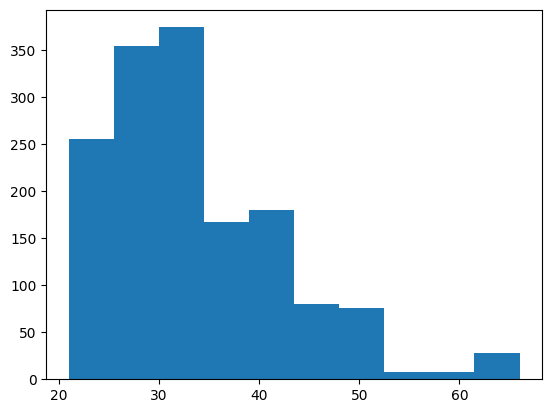

In [13]:
# Plotting the distribution, using: plt.hist(df['Your_Column_Name'])
# Use your data and the column name, "Age".
plt.hist(df['Age'])

# Show the plot
plt.show()


### 2.2 Create a new categorical variable by grouping age to 21-30, 31-40, and above 40

In [17]:
# Create a new categorical variable for age groups
df_con['age_group'] = pd.cut(df_con['Age'], bins=[20, 30, 40, float('inf')], labels=['21-30', '31-40', 'above 40'], right=False)

# Check the unique values of the new age group using this code: df['Your_Column_Name'].value_counts()
df_con['age_group'].value_counts()

<ipython-input-17-8ed58b4c0631>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_con['age_group'] = pd.cut(df_con['Age'], bins=[20, 30, 40, float('inf')], labels=['21-30', '31-40', 'above 40'], right=False)


,count
age_group,
21-30,188
31-40,176
above 40,114


## Task 3 Transformation
### 3.1 Visualize summary writing time (SumRT)

(array([176.,   0.,   0.,   0.,   0., 188.,   0.,   0.,   0., 114.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

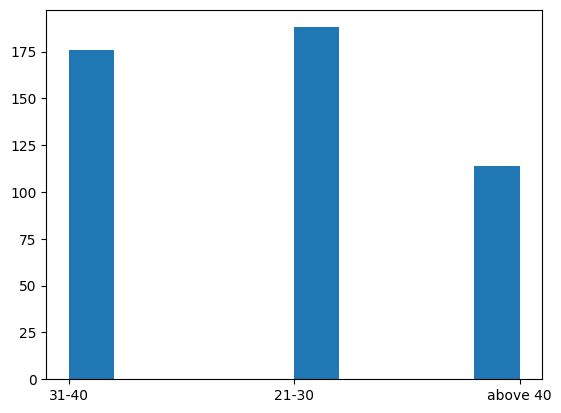

In [19]:
# Plotting the distribution, using: plt.hist(df['Your_Column_Name'])
plt.hist(df_con['age_group'])


### 3.2 Create a new categorical variable by using log transformation, and visualize the transformed variable

(array([  2.,   3.,   7.,   9.,  41., 143., 176.,  66.,  20.,   5.]),
 array([1.59351176, 2.31924507, 3.04497839, 3.7707117 , 4.49644501,
        5.22217832, 5.94791163, 6.67364495, 7.39937826, 8.12511157,
        8.85084488]),
 <BarContainer object of 10 artists>)

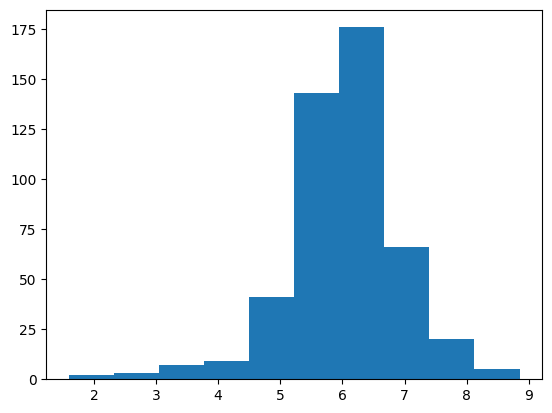

In [31]:
# First, ensure there are no non-positive values in 'SumRT' as log transformation requires positive values


# Apply log transformation to 'SumRT' column
df_con['SumRT_log'] = np.log(df_con['SumRT'])



# Visualize the transformed variable
plt.hist(df_con['SumRT_log'])


## Task 4 Encoding
### 4.1 How many levels of highest educational level (Edu)

In [21]:
# Check the unique values of the new age group using this code: df['Your_Column_Name'].value_counts()
df_con['SumRT_log'].value_counts()


,count
SumRT_log,
5.969467,2
6.212293,2
7.303622,1
5.365462,1
5.304702,1
...,...
6.238782,1
5.312279,1
4.783182,1


### 4.2 Encode this varialbe using a suitable encoding method.
#### The integer in the Edu column represents different levels of highest education:
#### 3:'Some high school', 4:'High School', 5:'Some college', 7:'Associate', 8:'Bachelor', 9:'Master', 11:'Doctoral'

In [22]:
replace_edu = {3:'Some high school', 4:'High School', 5:'Some college', 7:'Associate',
               8:'Bachelor', 9:'Master', 10:'Professional', 11:'Doctoral'}
df_con['Edu_cat'] = df_con['Edu'].replace(replace_edu)


# Check the unique values of the new age group using this code: df['Your_Column_Name'].value_counts()

df_con['Edu_cat'].value_counts()

<ipython-input-22-2e23ce51e22e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_con['Edu_cat'] = df_con['Edu'].replace(replace_edu)


,count
Edu_cat,
Bachelor,204
Master,128
Doctoral,40
Some college,30
Professional,24
High School,20
Associate,20
Some high school,12


### 4.3 Concatenate the coded variable with the orignal data

In [24]:
## Create a dummy coded variable
dummy_coded = pd.get_dummies(df_con['Edu_cat'], prefix='Edu')


# Merge the dummy coded variable to the dataset
df_con = pd.concat([df_con, dummy_coded], axis=1)



### 4.4 Address the prevalence of zeroes in the generated variables by using appropriate techniques.

In [25]:
## Bonus Creative Assignments
### 1. Use appropriate methods to handle the following variables:
#### (1) Ethnicity {1:'White', 2:'Hispanic', 3:'Black', 4:'Native American', 5:'Asian', 6:'Pacific Islander', 7:'Other'}
#### (2) Birth country (BirthCountry)
#### (3) The country where participants stay during the experiment (StayCountry)
#### (4) The years they learned English as a foreign or second language (EngYear)
#### (5) The duration of their stay in the country (Howlong)
### 2. Which features robustly predict students' use of formality?

In [26]:
# Create new educated variable as an example
replace_edu_new = {3:'No Bachelor', 4:'No Bachelor', 5:'No Bachelor', 7:'No Bachelor',
               8:'Bachelor', 9:'Master or higher', 10:'Master or higher', 11:'Master or higher'}
df_con['Edu_new'] = df_con['Edu'].replace(replace_edu_new)


dummy_coded_new = pd.get_dummies(df_con['Edu_new'], prefix='Edu_New')
dummy_coded_new

,Edu_New_Bachelor,Edu_New_Master or higher,Edu_New_No Bachelor
0,True,False,False
1,True,False,False
2,True,False,False
7,True,False,False
8,True,False,False
...,...,...,...
977,False,False,True
978,False,True,False
979,False,True,False
980,False,True,False


In [27]:
df_con = pd.concat([df_con, dummy_coded_new], axis=1)
df_con.head(5)

,UserID,LessonID,Session,ClassID,GroupID,TextOrder,StrOrder,Structure,LessonAttempt,TrialNo,TotalTime,TotalTimeCompute,XML,Q1Data,Q2Data,Arousal,Valence,MindWand,TextDiff,SumWrite,SelfRate,Rating1,Rating2,Rating3,Rating1Cor,Rating2Cor,Rating3Cor,Rating1SQRT,Rating2SQRT,Rating3SQRT,ReadTime,AffectRT,MindWandRT,TextDiffRT,SumRT,SelfRateRT,Rating1RT,Rating2RT,Rating3RT,SurveyID,Condition,ID_Pre,Age,Sex,Ethnicity,CountrBorn,CountrStay,Language,EngYear,EngCoun,Howlong,Edu,Major,Status,Job,StudyFurth,ImportanceReading,ImportanceSummary,Typing,DurationPost,DurationPre,PropDog,PropJobFair,PropChocolate,PropTotal,ZPropTotal,PCPreEfficacy,PCPreSumPerception,PCComputerExperience,PCPostEfficacy,PCAttitudeTeacher,PCAttitudeStudent,ZAttitude_17,ZAttitude_18,CohMetrixID,AvgFormality,Trial,DESPC,DESSC,DESWC,DESPL,DESPLd,DESSL,DESSLd,DESWLsy,DESWLsyd,DESWLlt,DESWLltd,PCNARz,PCNARp,PCSYNz,PCSYNp,PCCNCz,PCCNCp,PCREFz,PCREFp,PCDCz,PCDCp,PCVERBz,PCVERBp,PCCONNz,PCCONNp,PCTEMPz,PCTEMPp,CRFNO1,CRFAO1,CRFSO1,CRFNOa,CRFAOa,CRFSOa,CRFCWO1,CRFCWO1d,CRFCWOa,CRFCWOad,CRFANP1,CRFANPa,LSASS1,LSASS1d,LSASSp,LSASSpd,LSAPP1,LSAPP1d,LSAGN,LSAGNd,LDTTRc,LDTTRa,LDMTLD,LDVOCD,CNCAll,CNCCaus,CNCLogic,CNCADC,CNCTemp,CNCTempx,CNCAdd,CNCPos,CNCNeg,SMCAUSv,SMCAUSvp,SMINTEp,SMCAUSr,SMINTEr,SMCAUSlsa,SMCAUSwn,SMTEMP,SYNLE,SYNNP,SYNMEDpos,SYNMEDwrd,SYNMEDlem,SYNSTRUTa,SYNSTRUTt,DRNP,DRVP,DRAP,DRPP,DRPVAL,DRNEG,DRGERUND,DRINF,WRDNOUN,WRDVERB,WRDADJ,WRDADV,WRDPRO,WRDPRP1s,WRDPRP1p,WRDPRP2,WRDPRP3s,WRDPRP3p,WRDFRQc,WRDFRQa,WRDFRQmc,WRDAOAc,WRDFAMc,WRDCNCc,WRDIMGc,WRDMEAc,WRDPOLc,WRDHYPn,WRDHYPv,WRDHYPnv,WRDPOSin,WRDPOSuh,RDFRE,RDFKGL,RDL2,formality,NonNarrativity,Syntactic Complexity,Word Abstractness,Referential Cohesion,Deep Cohesion,Test,age_group,SumRT_log,Edu_cat,Edu_Associate,Edu_Bachelor,Edu_Doctoral,Edu_High School,Edu_Master,Edu_Professional,Edu_Some college,Edu_Some high school,Edu_Associate,Edu_Bachelor,Edu_Doctoral,Edu_High School,Edu_Master,Edu_Professional,Edu_Some college,Edu_Some high school,Edu_new,Edu_New_Bachelor,Edu_New_Master or higher,Edu_New_No Bachelor
0,FORMAL1_01,lesson10,Test,formal,1,1,11,Comparison,2,2,1702.352,1677.857,Lesson10-Butterfly.xml,Next,Arousal5_Pleasant5,5,5,2,2,Insects Insects butterfly and moth are very ti...,5.0,5.0,5.0,5.0,1.5,3.5,5.5,1.870829,1.224745,0.707107,1361.360,10.953,10.406,4.875,262.812,6.281,13.593,3.781,3.796,86,Formal,1,30,2,5,India,India,2,15,2.0,0.0,8,pharmacy,2,online selling,2,1,1,3,182,564.0,0.666667,1.000000,0.5,0.7,-0.177352,0.674246,0.824913,1.056000,-1.063388,-1.618065,-0.828716,-1.888861,-2.229093,2011,NaN,1,1,6,56,6,0,9.667,8.501000,1.607,0.755,5.214,2.661,-0.904,18.41,0.363,64.059998,-0.406,34.459999,-0.871,19.219999,0.008,50.000000,2.377,99.110001,-0.920,17.879999,2.160,98.459999,0.0,0.4,0.0,0.067,0.267,0.133,0.124,0.170,0.080,0.126,0.6,0.400,0.185,0.191,0.193,0.241,0,0,0.241,0.222,0.857,0.776,72.455002,0.0,71.429001,35.714001,17.857,17.857,17.857000,0.0,17.857000,71.429001,0.000,35.714001,53.570999,17.857,0.333,1.0,0.150,0.800,1.00,1.500,0.667,0.561,0.902,0.902,0.300,0.216,303.571014,196.429001,17.857000,89.286003,0.000,0.000,0.000,0.000,285.713989,53.570999,178.570999,107.142998,53.570999,0.0,0.0,0.0,0.0,53.570999,2.304,2.780,0.770,285.399994,570.232971,377.723999,406.600006,418.148010,5.213,6.992,1.125,2.119,89.286003,0.000,61.410000,7.012000,30.988001,0.084,0.8159,0.3594,0.6554,0.1922,0.5000,PreTest,31-40,5.571439,Bachelor,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,Bachelor,True,False,False
1,FORMAL1_01,lesson2,Test,formal,1,8,22,Causation,1,1,181.785,160.728,Lesson2-Flood.xml,Next,Arousal5_Pleasant5,5,5,2,3,natural waterflowfloods are a natural disaster...,3.0,4.0,4.0,4.0,3.5,1.5,5.5,0.707107,1.581139,1.224745,13.421,2.765,5.046,3.296,122.421,2.468,3.609,3.593,4.109,86,Formal,1,30,2,5,India,India,2,15,2.0,0.0,8,pharmacy,2,online selling,2,1,1,3,182,564.0,0.666667,1.000000,0.5,0.7,-0.177352,0.674246,0.824913,1.056000,-1.063388,-1.618065,-0.828716,-1.